In [77]:
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

# read data

In [78]:
words = open('../data/names.txt', 'r').read().splitlines()

In [79]:
len(words)

32033

In [80]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [81]:
chars = sorted(list(set(''.join(words))))

# util

In [82]:
itos = {}
itos[0] = '.'
itos |= {i+1: s for i, s in enumerate(chars)}

In [83]:
stoi = {s: i for i, s in itos.items()}

# Build a neural language model

## prepare data

In [84]:
block_size = 3
X, Y = [], []
for w in words[:]:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        # print(''.join([itos[i] for i in context]), '--->', itos[ix])
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]        

In [85]:
X = torch.tensor(X)
Y = torch.tensor(Y)        

In [86]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

## embedding matrix C

In [87]:
C = torch.randn(len(itos), 2)
C.shape

torch.Size([27, 2])

In [88]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

## hidden layer

In [89]:
w1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [90]:
h = (emb.view(emb.shape[0], -1) @ w1 + b1).tanh()
h.shape

torch.Size([228146, 100])

## final layer

In [91]:
w2 = torch.randn(100, len(itos))
b2 = torch.randn(len(itos))

In [92]:
logits = h @ w2 + b2
logits.shape

torch.Size([228146, 27])

In [93]:
loss = F.cross_entropy(logits, Y)
loss

tensor(18.1817)

# Train a neural language model

In [94]:
C = torch.randn(len(itos), 2)
w1 = torch.randn(6, 100)
b1 = torch.randn(100)
w2 = torch.randn(100, len(itos))
b2 = torch.randn(len(itos))
parameters = [C, w1, b1, w2, b2]

In [95]:
sum(p.nelement() for p in parameters)

3481

In [96]:
for p in parameters:
    p.requires_grad = True

In [97]:
lossi = []
for _ in tqdm(range(30)):
    # forward
    emb = C[X]
    h = (emb.view(emb.shape[0], -1) @ w1 + b1).tanh()
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, Y)

    # backward
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad
        
    # tracking
    lossi.append(loss.item())

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.25it/s]


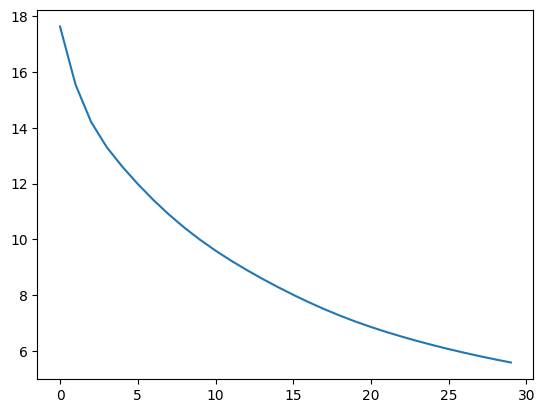

In [98]:
plt.plot(lossi)

In [99]:
lossi[-5:]

[6.058002948760986,
 5.926918029785156,
 5.8033766746521,
 5.6870646476745605,
 5.577755451202393]